In [1]:
!ls
!pwd

README.md      SVD            Untitled.ipynb scripts
/Users/leochoo/dev/GP2-dev


/Users/leochoo/.pyenv/versions/3.8.1/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


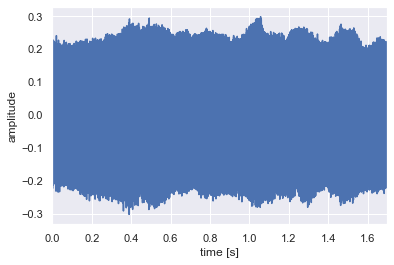

In [3]:
import parselmouth

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() # Use seaborn's default style to make attractive graphs

# Plot nice figures using Python's "standard" matplotlib library
snd = parselmouth.Sound("SVD/healthy/wav/1-i_n.wav")
plt.figure()
plt.plot(snd.xs(), snd.values.T)
plt.xlim([snd.xmin, snd.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show() # or plt.savefig("sound.png"), or plt.savefig("sound.pdf")

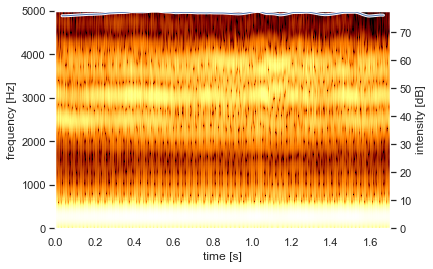

In [4]:
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")

intensity = snd.to_intensity()
spectrogram = snd.to_spectrogram()
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_intensity(intensity)
plt.xlim([snd.xmin, snd.xmax])
plt.show() # or plt.savefig("spectrogram.pdf")

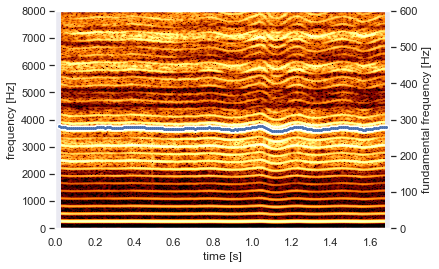

In [5]:
def draw_pitch(pitch):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.ylabel("fundamental frequency [Hz]")

pitch = snd.to_pitch()
# If desired, pre-emphasize the sound fragment before calculating the spectrogram
pre_emphasized_snd = snd.copy()
pre_emphasized_snd.pre_emphasize()
spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_pitch(pitch)
plt.xlim([snd.xmin, snd.xmax])
plt.show() # or plt.savefig("spectrogram_0.03.pdf")

In [8]:
sound = parselmouth.Sound("SVD/healthy/wav/1-i_n.wav")
pitch = sound.to_pitch()
pulses = parselmouth.praat.call([sound, pitch], "To PointProcess (cc)")
voice_report_str = parselmouth.praat.call([sound, pitch, pulses], "Voice report", 0.0, 0.0, 75, 600, 1.3, 1.6, 0.03, 0.45)

print(voice_report_str)

   From 0 to 1.700020 seconds (duration: 1.700020 seconds)
Pitch:
   Median pitch: 276.639 Hz
   Mean pitch: 276.112 Hz
   Standard deviation: 2.844 Hz
   Minimum pitch: 267.323 Hz
   Maximum pitch: 282.009 Hz
Pulses:
   Number of pulses: 463
   Number of periods: 462
   Mean period: 3.621559E-3 seconds
   Standard deviation of period: 0.038029E-3 seconds
Voicing:
   Fraction of locally unvoiced frames: 0   (0 / 167)
   Number of voice breaks: 0
   Degree of voice breaks: 0   (0 seconds / 1.700020 seconds)
Jitter:
   Jitter (local): 0.210%
   Jitter (local, absolute): 7.589E-6 seconds
   Jitter (rap): 0.118%
   Jitter (ppq5): 0.113%
   Jitter (ddp): 0.354%
Shimmer:
   Shimmer (local): 0.742%
   Shimmer (local, dB): 0.065 dB
   Shimmer (apq3): 0.352%
   Shimmer (apq5): 0.424%
   Shimmer (apq11): 0.667%
   Shimmer (dda): 1.057%
Harmonicity of the voiced parts only:
   Mean autocorrelation: 0.997340
   Mean noise-to-harmonics ratio: 0.002669
   Mean harmonics-to-noise ratio: 26.215 dB



In [28]:
vrs = voice_report_str

vr_list = vrs.split("\n")
vr_list

['   From 0 to 1.700020 seconds (duration: 1.700020 seconds)',
 'Pitch:',
 '   Median pitch: 276.639 Hz',
 '   Mean pitch: 276.112 Hz',
 '   Standard deviation: 2.844 Hz',
 '   Minimum pitch: 267.323 Hz',
 '   Maximum pitch: 282.009 Hz',
 'Pulses:',
 '   Number of pulses: 463',
 '   Number of periods: 462',
 '   Mean period: 3.621559E-3 seconds',
 '   Standard deviation of period: 0.038029E-3 seconds',
 'Voicing:',
 '   Fraction of locally unvoiced frames: 0   (0 / 167)',
 '   Number of voice breaks: 0',
 '   Degree of voice breaks: 0   (0 seconds / 1.700020 seconds)',
 'Jitter:',
 '   Jitter (local): 0.210%',
 '   Jitter (local, absolute): 7.589E-6 seconds',
 '   Jitter (rap): 0.118%',
 '   Jitter (ppq5): 0.113%',
 '   Jitter (ddp): 0.354%',
 'Shimmer:',
 '   Shimmer (local): 0.742%',
 '   Shimmer (local, dB): 0.065 dB',
 '   Shimmer (apq3): 0.352%',
 '   Shimmer (apq5): 0.424%',
 '   Shimmer (apq11): 0.667%',
 '   Shimmer (dda): 1.057%',
 'Harmonicity of the voiced parts only:',
 '  

In [49]:
# jitter
jitter_local = parselmouth.praat.call(pulses, "Get jitter (local)", 0.0, 0.0, 0.0001, 0.02, 1.3) * 100
jitter_local
    
    

0.20954443728430183

In [62]:
 import os
 sounds = os.listdir("/Users/leochoo/dev/GP2-dev/SVD/pathological/psychogenic/wav")
 print(sounds)

['2337-i_n.wav', '1989-i_n.wav', '1964-i_n.wav', '1322-i_n.wav', '2246-i_n.wav', '1663-i_n.wav', '1673-i_n.wav', '1340-i_n.wav', '741-i_n.wav', '911-i_n.wav', '1593-i_n.wav', '2526-i_n.wav', '1566-i_n.wav', '2310-i_n.wav', '1421-i_n.wav', '2372-i_n.wav', '1928-i_n.wav', '885-i_n.wav', '1230-i_n.wav', '2336-i_n.wav', '2213-i_n.wav', '1988-i_n.wav', '1931-i_n.wav', '151-i_n.wav', '2107-i_n.wav', '2123-i_n.wav', '2535-i_n.wav', '1958-i_n.wav', '2074-i_n.wav', '1266-i_n.wav', '2302-i_n.wav', '2312-i_n.wav', '1477-i_n.wav', '1951-i_n.wav', '1787-i_n.wav', '1329-i_n.wav', '1306-i_n.wav', '2104-i_n.wav', '1891-i_n.wav', '1459-i_n.wav', '1661-i_n.wav', '1904-i_n.wav', '1258-i_n.wav', '2534-i_n.wav', '1432-i_n.wav', '1744-i_n.wav', '1959-i_n.wav', '2316-i_n.wav', '1690-i_n.wav', '823-i_n.wav', '1408-i_n.wav', '1335-i_n.wav', '1053-i_n.wav', '2339-i_n.wav', '877-i_n.wav', '2528-i_n.wav', '366-i_n.wav', '848-i_n.wav', '1767-i_n.wav', '2517-i_n.wav', '2433-i_n.wav', '2441-i_n.wav', '1568-i_n.wav',

In [95]:
import parselmouth
import os


healthy_root = "/Users/leochoo/dev/GP2-dev/SVD/healthy/wav/"
patho_root = "/Users/leochoo/dev/GP2-dev/SVD/pathological/psychogenic/wav/"

def get_jitter_local(root):
    sounds = os.listdir(root)
    name = []
    jitter = []
    for sound in sounds:
        name.append(sound)
#         print(sound)
        snd = parselmouth.Sound(root + sound)
        # convert the object
        pitch = snd.to_pitch()
        pulses = parselmouth.praat.call([snd, pitch], "To PointProcess (cc)")
        # jitter
        jitter_local = parselmouth.praat.call(pulses, "Get jitter (local)", 0.0, 0.0, 0.0001, 0.02, 1.3) * 100
#         print(jitter_local)
        jitter.append(jitter_local)
#     print(len(name), len(jitter))
    return name, jitter


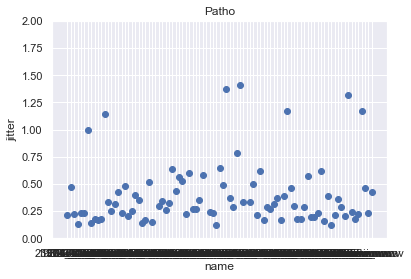

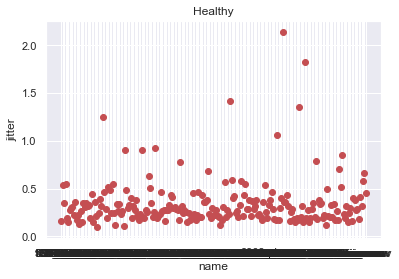

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() # Use seaborn's default style to make attractive graphs

plt.ylim(top=2)
# patho
name, jitter = get_jitter_local(patho_root)
plt.scatter(name, jitter, c='b')
plt.xlabel("name")
plt.ylabel("jitter")
plt.title("Patho")
plt.show()

# healthy
name, jitter = get_jitter_local(healthy_root)

plt.scatter(name, jitter, c="r")
plt.xlabel("name")
plt.ylabel("jitter")
plt.title("Healthy")
plt.show()

No handles with labels found to put in legend.


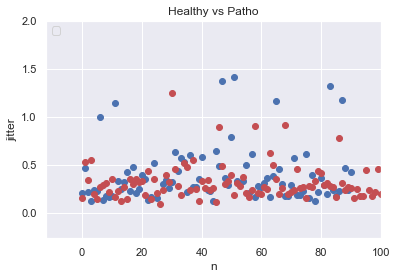

In [122]:
# this is supposed to be in bargraph, 
# but i want to see how it looks like in a scatterplot
# here instead of name, we return number from 0 
def get_jitter_local2(root):
    sounds = os.listdir(root)
    jitter = []
    for sound in sounds:
        name.append(sound)
#         print(sound)
        snd = parselmouth.Sound(root + sound)
        # convert the object
        pitch = snd.to_pitch()
        pulses = parselmouth.praat.call([snd, pitch], "To PointProcess (cc)")
        # jitter
        jitter_local = parselmouth.praat.call(pulses, "Get jitter (local)", 0.0, 0.0, 0.0001, 0.02, 1.3) * 100
#         print(jitter_local)
        jitter.append(jitter_local)
#     print(len(name), len(jitter))
    return jitter


# patho
j1 = get_jitter_local2(patho_root)

# healthy
j2 = get_jitter_local2(healthy_root)



# patho
plt.scatter(list(range(len(j1))), j1, c='b')
plt.xlabel("n")
plt.ylabel("jitter")

# healthy
plt.scatter(list(range(len(j2))), j2, c="r")

plt.title("Healthy vs Patho")
plt.ylim(top=2)
plt.xlim(right=100)
plt.legend(loc=2)
plt.show()
